In [2]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 8.0 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

In [4]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 226MB/s]


In [5]:
results = model.predict("cat_dog.jpg")



image 1/1 /content/cat_dog.jpg: 448x640 1 cat, 1 dog, 2177.6ms
Speed: 15.6ms preprocess, 2177.6ms inference, 43.3ms postprocess per image at shape (1, 3, 448, 640)


In [11]:
result = results[0]
len(result.boxes)

2

In [12]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: dog
Coordinates: [261, 94, 461, 314]
Probability: 0.94
---
Object type: cat
Coordinates: [140, 170, 256, 315]
Probability: 0.91
---


In [17]:
import cv2
from google.colab.patches import cv2_imshow

In [14]:
image = cv2.imread('cat_dog.jpg')

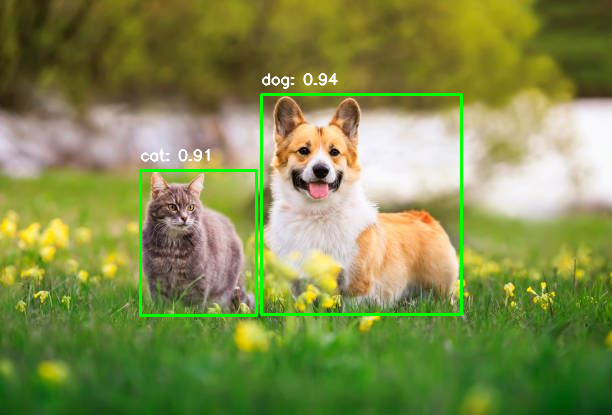

In [19]:
# Iterate over predictions and draw bounding boxes and labels
for box in result.boxes:
    # Draw the bounding box
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)

    start_point = (cords[0], cords[1]) # Top left corner
    end_point = (cords[2], cords[3])   # Bottom right corner
    color = (0, 255, 0) # Green color in BGR
    thickness = 2
    cv2.rectangle(image, start_point, end_point, color, thickness)

    # Add the label
    label = f'{class_id}: {conf:.2f}'
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_color = (255, 255, 255) # White color
    cv2.putText(image, label, (cords[0], cords[1] - 10),
                font, font_scale, font_color, 1, cv2.LINE_AA)

# Display the image
cv2_imshow( image)